In [16]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [17]:
class AgentState(TypedDict):
    first_number:int
    operation1:str
    second_number:int
    third_number:int
    operation2:str
    fourth_number:int
    final_number1:int
    final_number2:int

In [18]:
def add(state:AgentState) -> AgentState:
    """This function calculates the sum of the two given numbers"""
    state['final_number1']=state['first_number']+state['second_number']
    return state

def sub(state:AgentState):
    """This function calculates the difference of the two given numbers"""
    state['final_number1']=state['first_number']-state['second_number']
    return state
def add2(state:AgentState) -> AgentState:
    """This function calculates the sum of the two given numbers"""
    state['final_number2']=state['first_number']+state['second_number']
    return state

def sub2(state:AgentState):
    """This function calculates the difference of the two given numbers"""
    state['final_number2']=state['first_number']-state['second_number']
    return state

def condition(state:AgentState) -> AgentState:
    """This node will decide where the program would go in execution"""
    if (state['operation1']=="+"): return "addition_edge"
    if (state['operation1']=="-"): return "subtract_edge"
def condition2(state:AgentState) -> AgentState:
    """This is the second node that will decide for addition or subtraction"""
    if (state['operation2']=="+"): return "addition_edge"
    if (state['operation2']=="-"): return "subtract_edge"


In [19]:
graph=StateGraph(AgentState)
graph.add_node("adder", add)
graph.add_node("subtractor", sub)
graph.add_node("router", lambda state:state)
graph.add_node("router2", lambda state:state)
graph.add_node("adder2", add2)
graph.add_node("subtractor2", sub2)
graph.add_edge(START, "router")
graph.add_conditional_edges("router", condition, {
    "addition_edge":"adder", "subtract_edge":"subtractor"
})
graph.add_edge("adder", "router2")
graph.add_edge("subtractor", "router2")
graph.add_conditional_edges("router2", condition2, {
    "addition_edge":"adder2", "subtraction_edge":"subtractor2"
})
graph.add_edge("adder2", END)
graph.add_edge("subtractor2", END)
app=graph.compile()

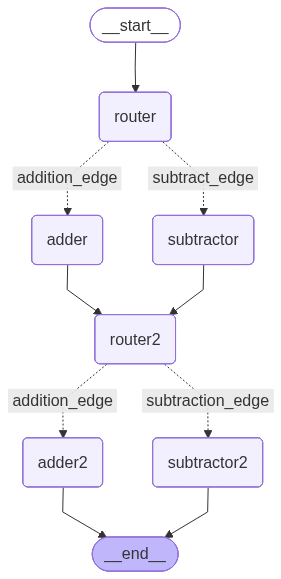

In [20]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [35]:
results=app.invoke({'first_number':4, 'operation1':"-", 'second_number':7, 'third_number':5, 'operation2':"+", 'fourth_number':4})
print(results['final_number1'])
print(results['final_number2'])

-3
11
